In [1]:
import pandas as pd
import geopandas as gpd
import folium
import numpy as np

import urllib.request, json 
import contextily as ctx
import matplotlib.pyplot as plt
import plotly.express as px
import urllib.request, json 
import plotly.express as px
import esda
from esda.moran import Moran, Moran_Local
import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation
import libpysal as lps
import matplotlib.pyplot as plt
import plotly.express as px
from sodapy import Socrata
import seaborn as sns
from pointpats import centrography
from matplotlib.patches import Ellipse
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
from sodapy import Socrata
import seaborn as sns
from pointpats import centrography
from matplotlib.patches import Ellipse

import urllib.request, json 
import plotly.express as px
import esda
from esda.moran import Moran, Moran_Local
import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation
import libpysal as lps
import matplotlib.pyplot as plt
import plotly.express as px

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
df = pd.read_csv(
    'Data/2007income.csv',
    dtype=
    {
        'FIPS':str,
        'State (FIPS)':str,
        'County': str 
    }
)

In [3]:
#df = df.dropna() 

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 67 columns):
 #   Column                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                       --------------  ----- 
 0   FIPS                                                                                                                         2347 non-null   object
 1   Name of Area                                                                                                                 2347 non-null   object
 2   Qualifying Name                                                                                                              2347 non-null   object
 3   State/U.S.-Abbreviation (USPS)                                                                                             

In [5]:
df.shape

(2347, 67)

In [6]:
columns = list(df) # this is the same as df.columns.to_list()
columns

['FIPS',
 'Name of Area',
 'Qualifying Name',
 'State/U.S.-Abbreviation (USPS)',
 'Summary Level',
 'Geographic Component',
 'File Identification',
 'Logical Record Number',
 'US',
 'Region',
 'Division',
 'State (Census Code)',
 'State (FIPS)',
 'County',
 'County Subdivision (FIPS)',
 'Place (FIPS Code)',
 'Place (State FIPS + Place FIPS)',
 'Census Tract',
 'Block Group',
 'Consolidated City',
 'American Indian Area/Alaska Native Area/Hawaiian Home Land (Census)',
 'American Indian Area/Alaska Native Area/Hawaiian Home Land (FIPS)',
 'American Indian Trust Land/Hawaiian Home Land Indicator',
 'American Indian Tribal Subdivision (Census)',
 'American Indian Tribal Subdivision (FIPS)',
 'Alaska Native Regional Corporation (FIPS)',
 'Metropolitan and Micropolitan Statistical Area',
 'Combined Statistical Area',
 'Metropolitan Division',
 'Metropolitan Area Central City',
 'Metropolitan/Micropolitan Indicator Flag',
 'New England City and Town Combined Statistical Area',
 'New England C

In [7]:
columns_to_keep = ['FIPS',
                     'Name of Area',
                     'Qualifying Name',
                     'State (FIPS)',
                     'County',
                     'Median Household Income (In 2011 Inflation Adjusted Dollars):',
                     'Median Household Income (In 2011 Inflation Adjusted Dollars): White Alone Householder',
                     'Median Household Income (In 2011 Inflation Adjusted Dollars): Black or African American Alone Householder',
                     'Median Household Income (In 2011 Inflation Adjusted Dollars): American Indian and Alaska Native Alone  Householder',
                     'Median Household Income (In 2011 Inflation Adjusted Dollars): Asian Alone',
                     'Median Household Income (In 2011 Inflation Adjusted Dollars): Native Hawaiian and Other Pacific Islander Alone  Householder',
                     'Median Household Income (In 2011 Inflation Adjusted Dollars): Some Other Race Alone Householder',
                     'Median Household Income (In 2011 Inflation Adjusted Dollars): Two or More Races Householder',
                     'Median Household Income (In 2011 Inflation Adjusted Dollars): Hispanic or Latino Householder',]
 

 

In [8]:
df = df[columns_to_keep]

In [9]:
df.columns = ['FIPS',
             'Name of Area',
             'Qualifying Name',
             'State (FIPS)',
             'County',
             'Median Income',
             'Median Income White',
             'Median Income Black',
             'Median Income AIANA',
             'Median Income Asian',
             'Median Income NHPI',
             'Median Income Some Other Race',
             'Median Income Two or More Races',
             'Median Income Latino']



In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [11]:
df['Median Income'] = pd.to_numeric(df['Median Income'], errors='coerce').fillna(0)
df['Median Income'] = df['Median Income'].astype(np.int64)
df['Median Income White'] = pd.to_numeric(df['Median Income White'], errors='coerce').fillna(0)
df['Median Income White'] = df['Median Income White'].astype(np.int64)
df['Median Income Black'] = pd.to_numeric(df['Median Income Black'], errors='coerce').fillna(0)
df['Median Income Black'] = df['Median Income Black'].astype(np.int64)
df['Median Income AIANA'] = pd.to_numeric(df['Median Income AIANA'], errors='coerce').fillna(0)
df['Median Income AIANA'] = df['Median Income AIANA'].astype(np.int64)
df['Median Income Asian'] = pd.to_numeric(df['Median Income Asian'], errors='coerce').fillna(0)
df['Median Income Asian'] = df['Median Income Asian'].astype(np.int64)
df['Median Income NHPI'] = pd.to_numeric(df['Median Income NHPI'], errors='coerce').fillna(0)
df['Median Income NHPI'] = df['Median Income NHPI'].astype(np.int64)
df['Median Income Some Other Race'] = pd.to_numeric(df['Median Income Some Other Race'], errors='coerce').fillna(0)
df['Median Income Some Other Race'] = df['Median Income Some Other Race'].astype(np.int64)
df['Median Income Two or More Races'] = pd.to_numeric(df['Median Income Two or More Races'], errors='coerce').fillna(0)
df['Median Income Two or More Races'] = df['Median Income Two or More Races'].astype(np.int64)
df['Median Income Latino'] = pd.to_numeric(df['Median Income Latino'], errors='coerce').fillna(0)
df['Median Income Latino'] = df['Median Income Latino'].astype(np.int64)

In [12]:
df['Percent Median Income White'] = df['Median Income White']/df['Median Income']*100
df['Percent Median Income Black'] = df['Median Income Black']/df['Median Income']*100
df['Percent Median Income AIANA'] = df['Median Income AIANA']/df['Median Income']*100
df['Percent Median Income Asian'] = df['Median Income Asian']/df['Median Income']*100
df['Percent Median Income NHPI'] = df['Median Income NHPI']/df['Median Income']*100
df['Percent Median Income Some Other Race'] = df['Median Income Some Other Race']/df['Median Income']*100
df['Percent Median Income Two or More Races'] = df['Median Income Two or More Races']/df['Median Income']*100
df['Percent Median Income Latino'] = df['Median Income Latino']/df['Median Income']*100

In [13]:
df.head (5)

,FIPS,Name of Area,Qualifying Name,State (FIPS),County,Median Income,Median Income White,Median Income Black,Median Income AIANA,Median Income Asian,Median Income NHPI,Median Income Some Other Race,Median Income Two or More Races,Median Income Latino,Percent Median Income White,Percent Median Income Black,Percent Median Income AIANA,Percent Median Income Asian,Percent Median Income NHPI,Percent Median Income Some Other Race,Percent Median Income Two or More Races,Percent Median Income Latino
0,Geo_FIPS,Geo_NAME,Geo_QName,Geo_STATE,Geo_COUNTY,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...","Census Tract 1011.10, Los Angeles County, Cali...",06,037,62813,62522,0,0,108250,0,42143,250001,43512,99.536720,0.000000,0.0,172.336937,0.0,67.092799,398.008374,69.272284
2,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...","Census Tract 1011.22, Los Angeles County, Cali...",06,037,90563,87656,0,0,92176,0,4024,87011,85163,96.790080,0.000000,0.0,101.781081,0.0,4.443316,96.077868,94.037300
3,06037101210,"Census Tract 1012.10, Los Angeles County, Cali...","Census Tract 1012.10, Los Angeles County, Cali...",06,037,41923,40865,112669,0,55795,0,35292,96295,36000,97.476326,268.752236,0.0,133.089235,0.0,84.182907,229.694917,85.871717
4,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...","Census Tract 1012.20, Los Angeles County, Cali...",06,037,48224,42750,0,0,53125,0,56750,15208,49127,88.648806,0.000000,0.0,110.162989,0.0,117.679993,31.536165,101.872512


In [14]:
df = df.drop([0])

In [15]:
df.dtypes

FIPS                                        object
Name of Area                                object
Qualifying Name                             object
State (FIPS)                                object
County                                      object
Median Income                                int64
Median Income White                          int64
Median Income Black                          int64
Median Income AIANA                          int64
Median Income Asian                          int64
Median Income NHPI                           int64
Median Income Some Other Race                int64
Median Income Two or More Races              int64
Median Income Latino                         int64
Percent Median Income White                float64
Percent Median Income Black                float64
Percent Median Income AIANA                float64
Percent Median Income Asian                float64
Percent Median Income NHPI                 float64
Percent Median Income Some Othe

In [16]:
def get_histogram(column = 'Median Income White'):
    series_to_plot=df[column]

    plt.figure(figsize=(10,5))

    plt.hist(series_to_plot,bins=60,color='purple')

    plt.axvline(series_to_plot.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(series_to_plot.median(), color='r', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(series_to_plot.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(series_to_plot.mean()))
    plt.text(series_to_plot.median()*1.1, max_ylim*0.8, 'Median: {:.2f}'.format(series_to_plot.median()),color='r')
    plt.title(column + ' in Los Angeles County 2007')
    plt.xlabel("Income", fontsize=16)  

In [17]:
indicators = ['Median Income White',
             'Median Income Black',
             'Median Income AIANA',
             'Median Income Asian',
             'Median Income NHPI',
             'Median Income Some Other Race',
             'Median Income Two or More Races',
             'Median Income Latino']

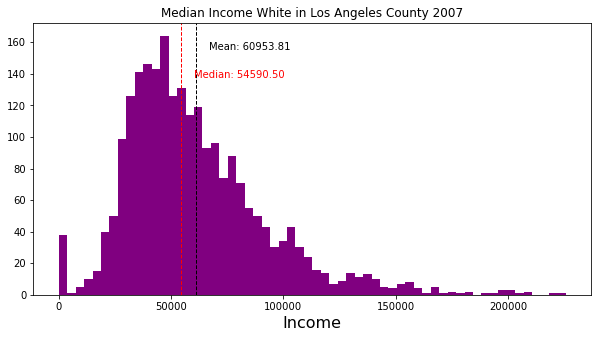

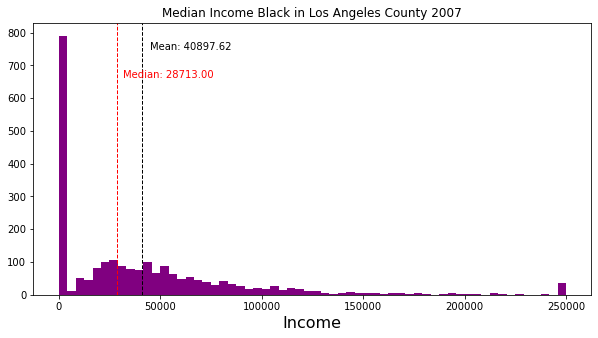

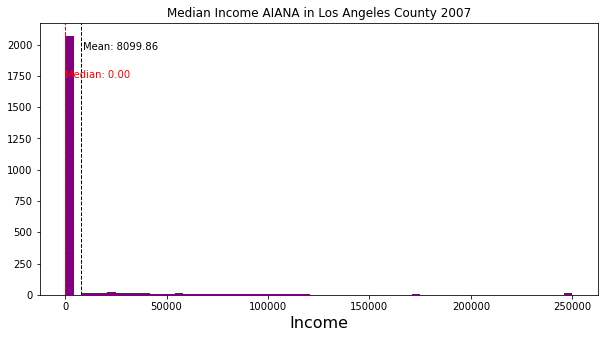

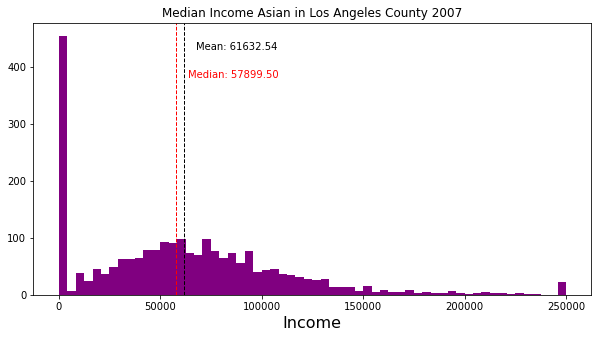

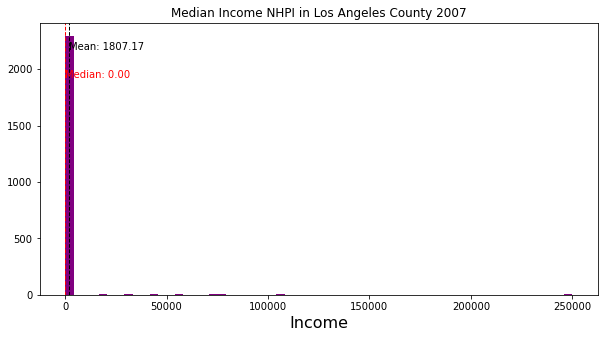

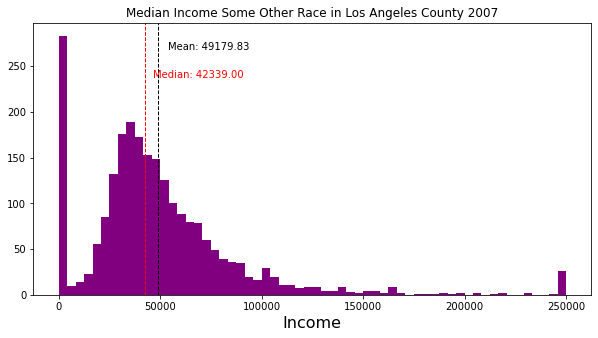

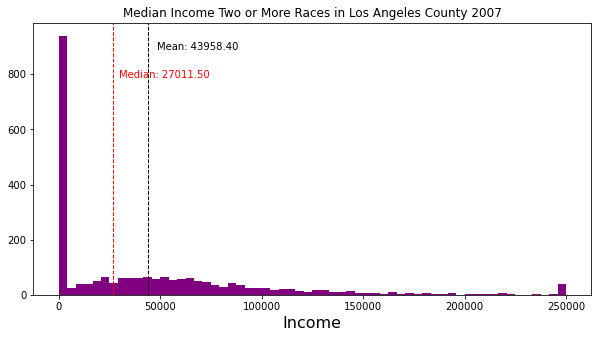

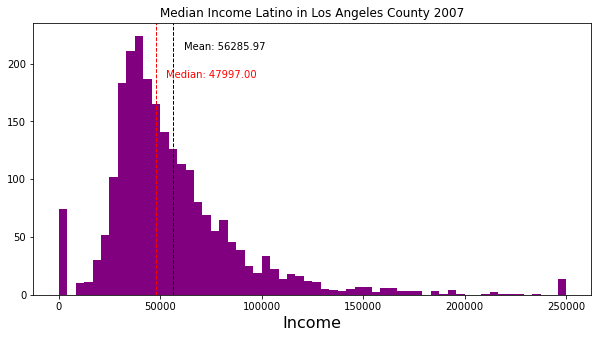

In [18]:
for indicator in indicators:
    get_histogram(column=indicator)

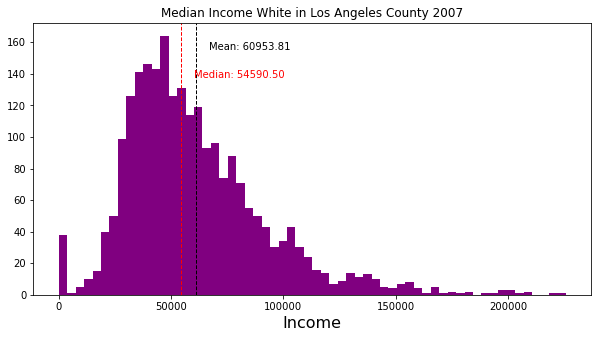

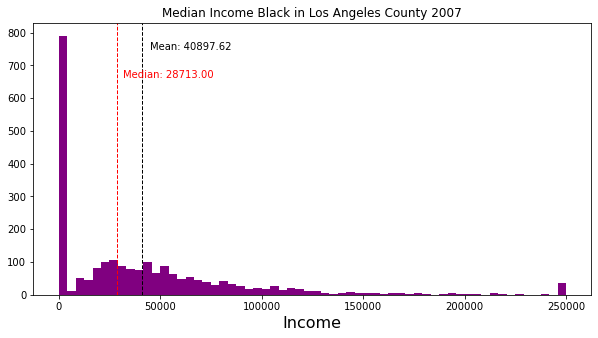

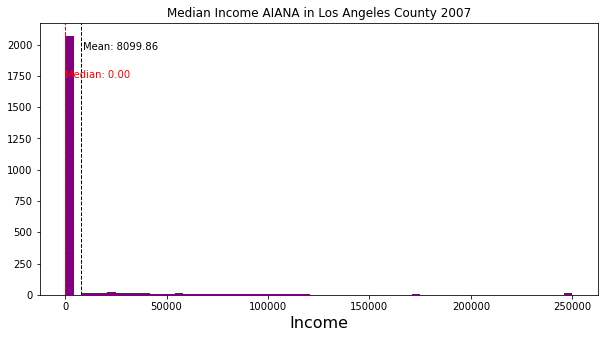

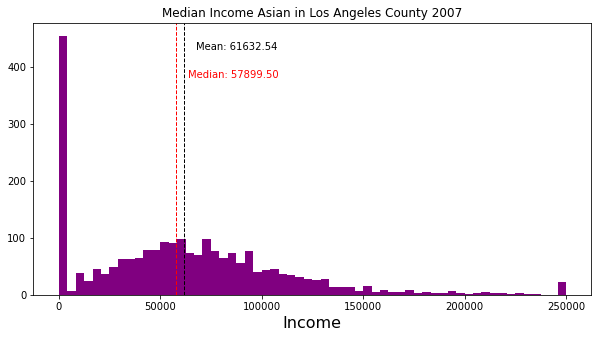

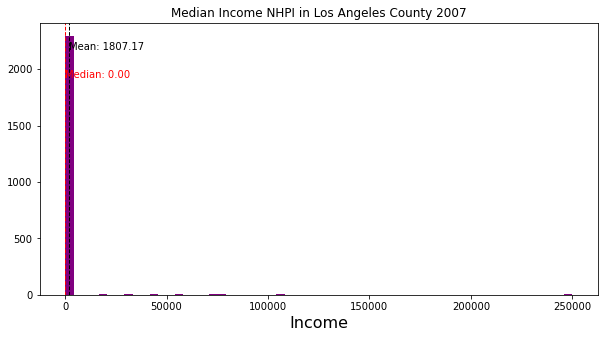

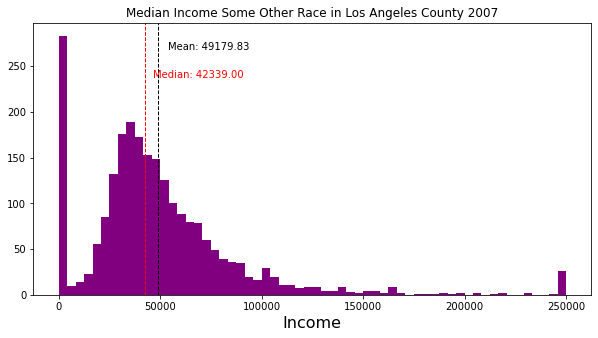

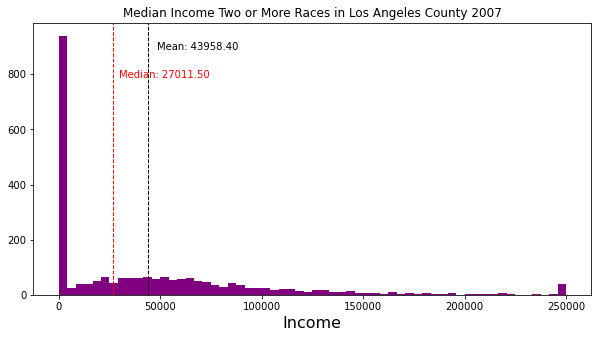

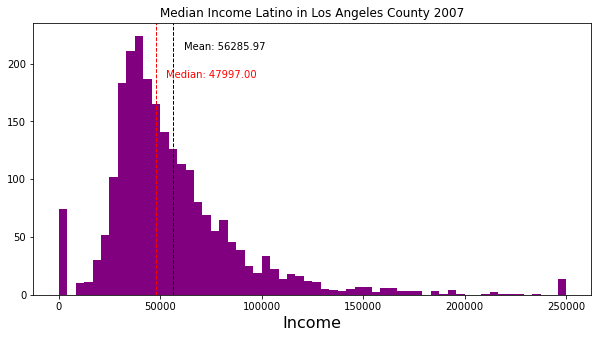

In [19]:
for indicator in indicators:
    get_histogram(column=indicator)